Found 22968 images belonging to 7 classes.


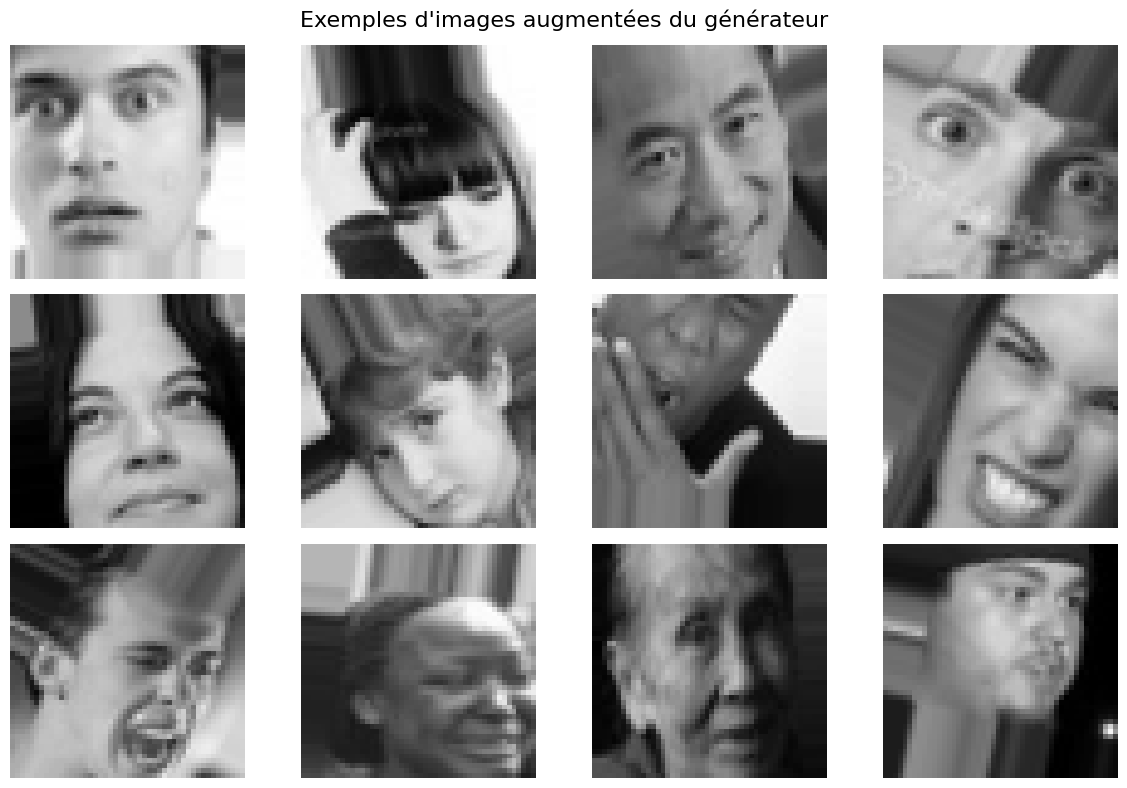

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Chemins des donn√©es
train_dir = "../data/train"
test_dir = "../data/test"

# Appliquer Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,        # Rotation al√©atoire des images
    width_shift_range=0.2,    # D√©calage horizontal
    height_shift_range=0.2,   # D√©calage vertical
    zoom_range=0.2,           # Zoom sur l'image
    horizontal_flip=True,     # Sym√©trie horizontale
    validation_split=0.2      # S√©parer validation et entra√Ænement
)  

# Chargement des images avec augmentation pour l'entra√Ænement
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(48, 48), 
    batch_size=32, 
    class_mode='categorical', 
    subset="training"
)

# Afficher un batch d'images transform√©es par le g√©n√©rateur
images, labels = next(train_generator)  # Obtenir un batch

plt.figure(figsize=(12, 8))
for i in range(12):  # Afficher les 12 premi√®res images du batch
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle('Exemples d\'images augment√©es du g√©n√©rateur', fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
# Chargement des images sans augmentation pour la validation
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(48, 48), 
    batch_size=32, 
    class_mode='categorical', 
    subset="validation"
)

Found 5741 images belonging to 7 classes.


In [16]:
# D√©finir le mod√®le CNN (on reprend le m√™me mod√®le)
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # 7 classes pour FER-2013
])

C:\Users\DELL\anaconda3\envs\analyse-sentiment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compiler le mod√®le
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# R√©-entra√Ænement avec les nouvelles donn√©es augment√©es
history_augmented = model.fit(train_generator, epochs=25, validation_data=validation_generator)
#  afficher le pourcentage final
final_train_accuracy = history_augmented.history['accuracy'][-1] * 100  # Accuracy entra√Ænement
final_val_accuracy = history_augmented.history['val_accuracy'][-1] * 100  # Accuracy validation

print(f"Pr√©cision finale sur l'ensemble d'entra√Ænement : {final_train_accuracy:.2f}%")
print(f"Pr√©cision finale sur l'ensemble de validation : {final_val_accuracy:.2f}%")


Epoch 1/25
718/718 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 46ms/step - accuracy: 0.5013 - loss: 1.3015 - val_accuracy: 0.4935 - val_loss: 1.3343
Epoch 2/25
718/718 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49s 68ms/step - accuracy: 0.5110 - loss: 1.2921 - val_accuracy: 0.4980 - val_loss: 1.3250
Epoch 3/25
718/718 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67s 93ms/step - accuracy: 0.5103 - loss: 1.2795 - val_accuracy: 0.5078 - val_loss: 1.2972
Epoch 4/25
718/718 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 66s 92ms/step - accuracy: 0.5109 - loss: 1.2811 - val_accuracy: 0.5039 - val_loss: 1.3064
Epoch 5/25
718/718 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67s 93ms/step - accuracy: 0.5117 - loss: 1.2794 - val_accuracy: 0.5022 - val_loss: 1.3071
Epoch 6/25
718/718 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 65s 90ms/step - accuracy: 0.5106 - loss: 1.2788 - val_accuracy: 0.5083

In [8]:
# Sauvegarde du nouveau mod√®le am√©lior√©
model.save("../models/emotion_cnn_augmented.keras")


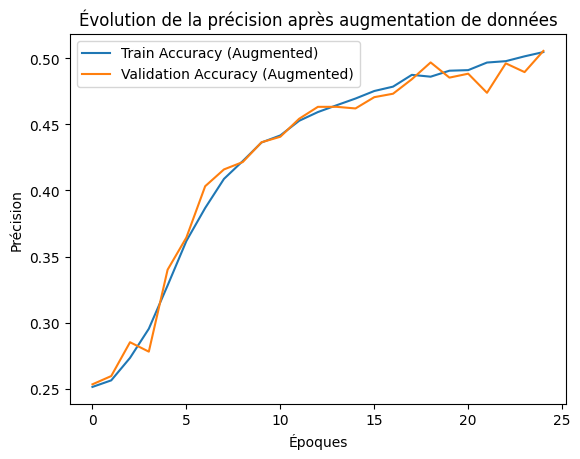

In [9]:

# Afficher les courbes d'entra√Ænement
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy (Augmented)')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy (Augmented)')
plt.xlabel('√âpoques')
plt.ylabel('Pr√©cision')
plt.legend()
plt.title('√âvolution de la pr√©cision apr√®s augmentation de donn√©es')
plt.show()

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 165ms/step


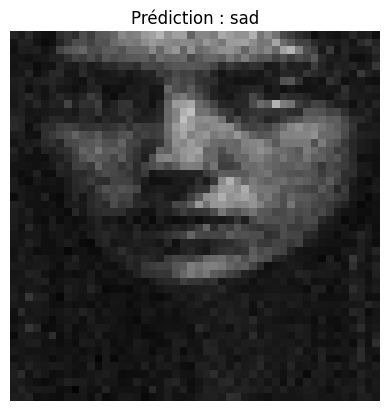

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
model_path = "../models/emotion_cnn_augmented.keras"
img_path = "../data/images/test2.jpg"

# 1. Charger le mod√®le
model = load_model(model_path)

# 2. Charger l'image en RGB (m√™me si elle est en gris)
img = image.load_img(img_path, target_size=(48, 48), color_mode="rgb")
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape (1,48,48,3)

# 3. Pr√©diction
predictions = model.predict(img_array)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_class = class_names[np.argmax(predictions)]

# 4. Affichage
plt.imshow(img)
plt.title(f"Pr√©diction : {predicted_class}")
plt.axis("off")
plt.show()

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 79ms/step


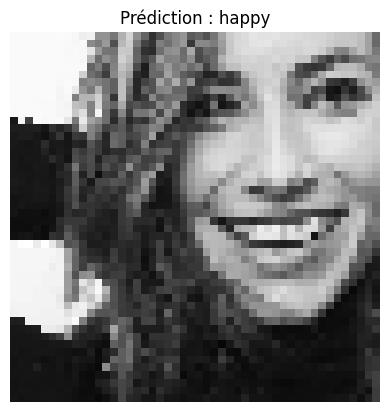

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
model_path = "../models/emotion_cnn_augmented.keras"
img_path = "../data/images/test3.jpg"

# 1. Charger le mod√®le
model = load_model(model_path)

# 2. Charger l'image en RGB (m√™me si elle est en gris)
img = image.load_img(img_path, target_size=(48, 48), color_mode="rgb")
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape (1,48,48,3)

# 3. Pr√©diction
predictions = model.predict(img_array)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_class = class_names[np.argmax(predictions)]

# 4. Affichage
plt.imshow(img)
plt.title(f"Pr√©diction : {predicted_class}")
plt.axis("off")
plt.show()

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 78ms/step


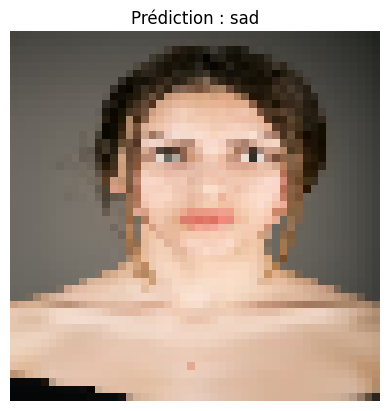

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
model_path = "../models/emotion_cnn_augmented.keras"
img_path = "../data/images/test4.jpg"

# 1. Charger le mod√®le
model = load_model(model_path)

# 2. Charger l'image en RGB (m√™me si elle est en gris)
img = image.load_img(img_path, target_size=(48, 48), color_mode="rgb")
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape (1,48,48,3)

# 3. Pr√©diction
predictions = model.predict(img_array)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_class = class_names[np.argmax(predictions)]

# 4. Affichage
plt.imshow(img)
plt.title(f"Pr√©diction : {predicted_class}")
plt.axis("off")
plt.show()

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 124ms/step


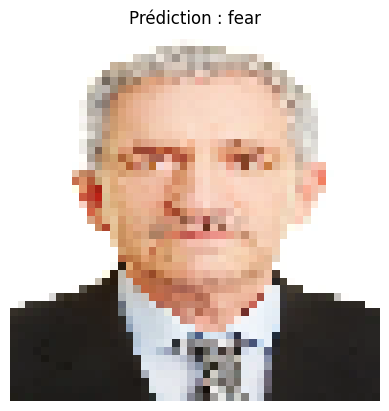

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
model_path = "../models/emotion_cnn_augmented.keras"
img_path = "../data/images/test1.png"

# 1. Charger le mod√®le
model = load_model(model_path)

# 2. Charger l'image en RGB (m√™me si elle est en gris)
img = image.load_img(img_path, target_size=(48, 48), color_mode="rgb")
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape (1,48,48,3)

# 3. Pr√©diction
predictions = model.predict(img_array)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_class = class_names[np.argmax(predictions)]

# 4. Affichage
plt.imshow(img)
plt.title(f"Pr√©diction : {predicted_class}")
plt.axis("off")
plt.show()

C:\Users\DELL\anaconda3\envs\analyse-sentiment\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 159ms/step


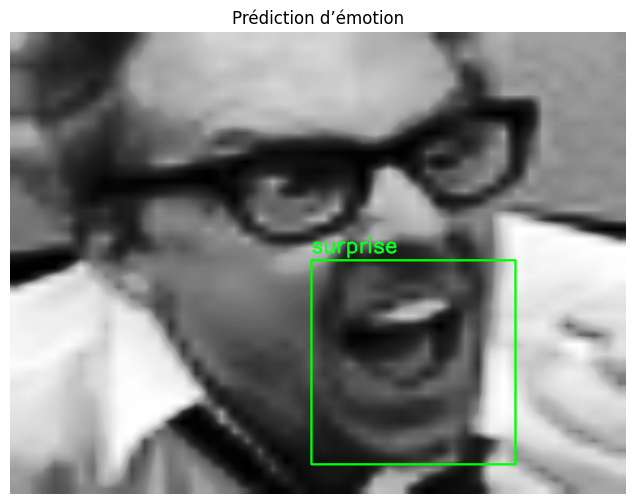

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# 1. Charger l'image originale
img_path = "../data/train/angry/Training_3908.jpg"
original_img = cv2.imread(img_path)

if original_img is None:
    print("‚ùå Image introuvable :", img_path)
else:
    # üü° Facultatif : redimensionner pour affichage
    original_img = cv2.resize(original_img, (800, 600))

    # üü¢ 2. Am√©lioration automatique de l‚Äôimage (contraste et luminosit√©)
    lab = cv2.cvtColor(original_img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)  # √âgalisation d‚Äôhistogramme sur le canal L
    lab = cv2.merge((l, a, b))
    original_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # 3. Charger le mod√®le
    model = load_model("../models/emotion_cnn_augmented.keras")

    # 4. Charger le d√©tecteur de visage
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # 5. Convertir en niveaux de gris pour la d√©tection
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    # 6. D√©tecter les visages
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("üòï Aucun visage d√©tect√©.")
    else:
        emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
        for (x, y, w, h) in faces:
            face = original_img[y:y+h, x:x+w]
            face = cv2.resize(face, (48, 48))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = face.astype("float32") / 255.0
            face = np.expand_dims(face, axis=0)

            predictions = model.predict(face)
            predicted_emotion = emotion_labels[np.argmax(predictions)]

            cv2.rectangle(original_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(original_img, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # 7. Affichage final
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title("Pr√©diction d‚Äô√©motion")
        plt.axis("off")
        plt.show()
